In [ ]:
import pandas as pd
import numpy as





from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/content/drive/My Drive/Colab Notebooks/Osteoporosis/N'
aug_dir = '/content/drive/My Drive/Colab Notebooks/O/Normal'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)
# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]

    return augmented_images
# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))

        # Perform augmentation
        augmented_images = augment_image(img)

        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [ ]:
import cv2
import numpy as np
import os

# Define the directory containing the original images
original_dir = '/content/drive/My Drive/Colab Notebooks/Osteoporosis/O'
aug_dir = '/content/drive/My Drive/Colab Notebooks/O/Osteo'

if not os.path.exists(aug_dir):
    os.makedirs(aug_dir)
# Function to perform augmentation on an image
def augment_image(image):
    # Example augmentations: flip horizontally, flip vertically, and rotate by 45 degrees
    augmented_images = [cv2.flip(image, 1),  # Horizontal flip
                        cv2.flip(image, 0),  # Vertical flip
                        cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE),
                        cv2.rotate(image, cv2.ROTATE_180)
                       ]

    return augmented_images
# Loop through each image in the original directory
for filename in os.listdir(original_dir):
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.JPEG'):  # Adjust as per your image file extensions
        # Read the image
        img = cv2.imread(os.path.join(original_dir, filename))

        # Perform augmentation
        augmented_images = augment_image(img)

        # Save augmented images back to the same directory
        for idx, augmented_img in enumerate(augmented_images):
            # Construct the new filename
            new_filename = os.path.splitext(filename)[0] + '_augmented_' + str(idx) + os.path.splitext(filename)[1]
            # Save the augmented image
            cv2.imwrite(os.path.join(aug_dir, new_filename), augmented_img)

print("Augmentation complete.")

Augmentation complete.


In [ ]:
import os
import pandas as pd

healthy_dirs = [
    r'/content/drive/My Drive/Colab Notebooks/O/Normal'
]


osteoporosis_dirs = [
    r'/content/drive/My Drive/Colab Notebooks/O/Osteo'
]
filepaths = []
labels = []
dict_lists = [healthy_dirs, osteoporosis_dirs]
class_labels = ['Healthy', 'Osteoporosis']

for i, dir_list in enumerate(dict_lists):
    for j in dir_list:
        flist = os.listdir(j)
        for f in flist:
            fpath = os.path.join(j, f)
            filepaths.append(fpath)
            labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
knee_osteoporosis_data = pd.concat([Fseries, Lseries], axis=1)
knee_osteoporosis_df = pd.DataFrame(knee_osteoporosis_data)
print(knee_osteoporosis_df.head())
print(knee_osteoporosis_df["labels"].value_counts())

                                           filepaths   labels
0  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
1  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
2  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
3  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
4  /content/drive/My Drive/Colab Notebooks/O/Norm...  Healthy
labels
Healthy         1860
Osteoporosis    1860
Name: count, dtype: int64


In [ ]:
knee_osteoporosis_df.shape

(3720, 2)

In [ ]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing.image import ImageDataGenerator
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [ ]:
train_images, test_images = train_test_split(knee_osteoporosis_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(knee_osteoporosis_df, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(2976, 2)
(1116, 2)
(744, 2)
(2604, 2)


In [ ]:
image_gen = ImageDataGenerator(preprocessing_function= tf.keras.applications.mobilenet_v2.preprocess_input)
train = image_gen.flow_from_dataframe(dataframe= train_set,x_col="filepaths",y_col="labels",
                                      target_size=(244,244),
                                      color_mode='rgb',
                                      class_mode="categorical", #used for Sequential Model
                                      batch_size=4,
                                      shuffle=False            #do not shuffle data
                                     )
test = image_gen.flow_from_dataframe(dataframe= test_images,x_col="filepaths", y_col="labels",
                                     target_size=(244,244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=4,
                                     shuffle= False
                                    )
val = image_gen.flow_from_dataframe(dataframe= val_set,x_col="filepaths", y_col="labels",
                                    target_size=(244,244),
                                    color_mode= 'rgb',
                                    class_mode="categorical",
                                    batch_size=4,
                                    shuffle=False
                                   )

Found 2976 validated image filenames belonging to 2 classes.
Found 1116 validated image filenames belonging to 2 classes.
Found 744 validated image filenames belonging to 2 classes.


In [ ]:
classes=list(train.class_indices.keys())
print (classes)

['Healthy', 'Osteoporosis']


In [ ]:
def show_knee_images(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen) # get a sample batch from the generator
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2 #scale images between 0 and 1
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

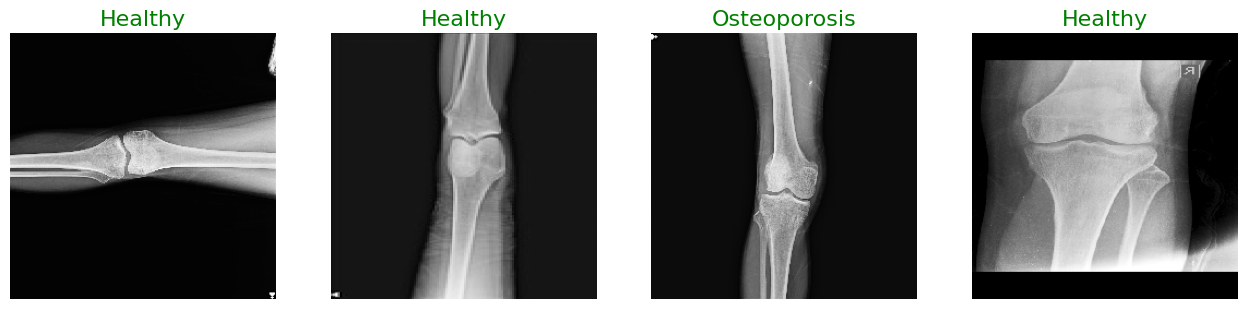

In [ ]:
show_knee_images(train)

MOBILENET

Epoch 1/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 103s 107ms/step - accuracy: 0.7104 - loss: 0.7744 - val_accuracy: 0.7728 - val_loss: 0.4676
Epoch 2/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 112s 89ms/step - accuracy: 0.7807 - loss: 0.4669 - val_accuracy: 0.7863 - val_loss: 0.4563
Epoch 3/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.8207 - loss: 0.4012 - val_accuracy: 0.8051 - val_loss: 0.4427
Epoch 4/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 81s 87ms/step - accuracy: 0.8431 - loss: 0.3501 - val_accuracy: 0.7177 - val_loss: 0.6181
Epoch 5/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 92s 100ms/step - accuracy: 0.8504 - loss: 0.3429 - val_accuracy: 0.8038 - val_loss: 0.4258
Epoch 6/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 66s 88ms/step - accuracy: 0.8599 - loss: 0.3317 - val_accuracy: 0.8091 - val_loss: 0.4288
Epoch 7/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 64s 86ms/step - accuracy: 0.8925 - loss: 0.2476 - val_accuracy: 0.8132 - val_loss: 0.4343
Epoch 8/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.8815 - loss: 0.254

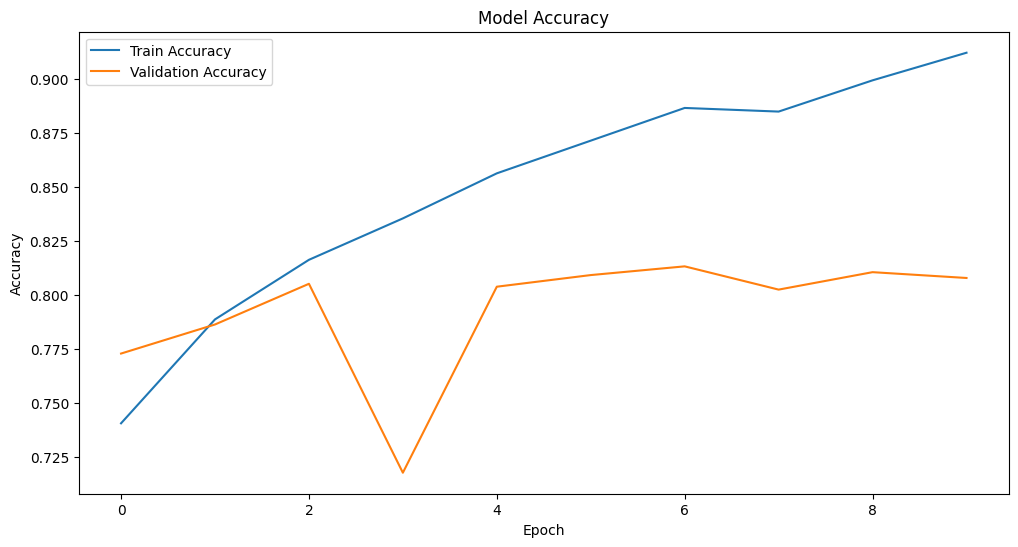

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.losses import SparseCategoricalCrossentropy #Changed the loss function
from tensorflow.keras.losses import CategoricalCrossentropy #Using CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard


# Define the MobileNet model
def create_mobilenet_model(num_classes):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(244, 244, 3))
    base_model.trainable = False  # Freeze the base model

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(1024, activation='relu'),
        Dense(num_classes, activation='softmax')  # For multi-class classification
    ])
    return model

# Set up the model
num_classes = len(train.class_indices)  # Number of unique labels
mobilenet_model = create_mobilenet_model(num_classes)

# Compile the model
# Use CategoricalCrossentropy instead of SparseCategoricalCrossentropy
mobilenet_model.compile(optimizer=Adam(learning_rate=1e-3),
              loss=CategoricalCrossentropy(),  # Changed to CategoricalCrossentropy
              metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
tensorboard = TensorBoard(log_dir='logs/')

# Train the model
history = mobilenet_model.fit(train,
                    validation_data=val,
                    epochs=15,  # Adjust as needed
                    callbacks=[early_stopping, tensorboard])

# Evaluate the model on the test set
test_loss, test_accuracy = mobilenet_model.evaluate(test)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

279/279 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step


<Figure size 1000x1000 with 0 Axes>

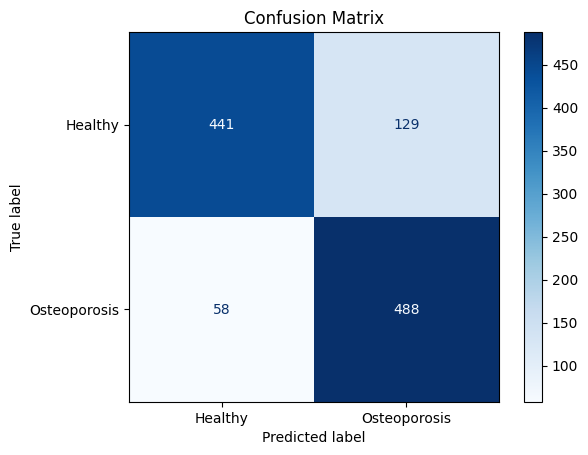

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming `test` is a generator or dataset with batches and class labels
# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # The true labels from the test set

# Predict the probabilities for each class
pred_probabilities = mobilenet_model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

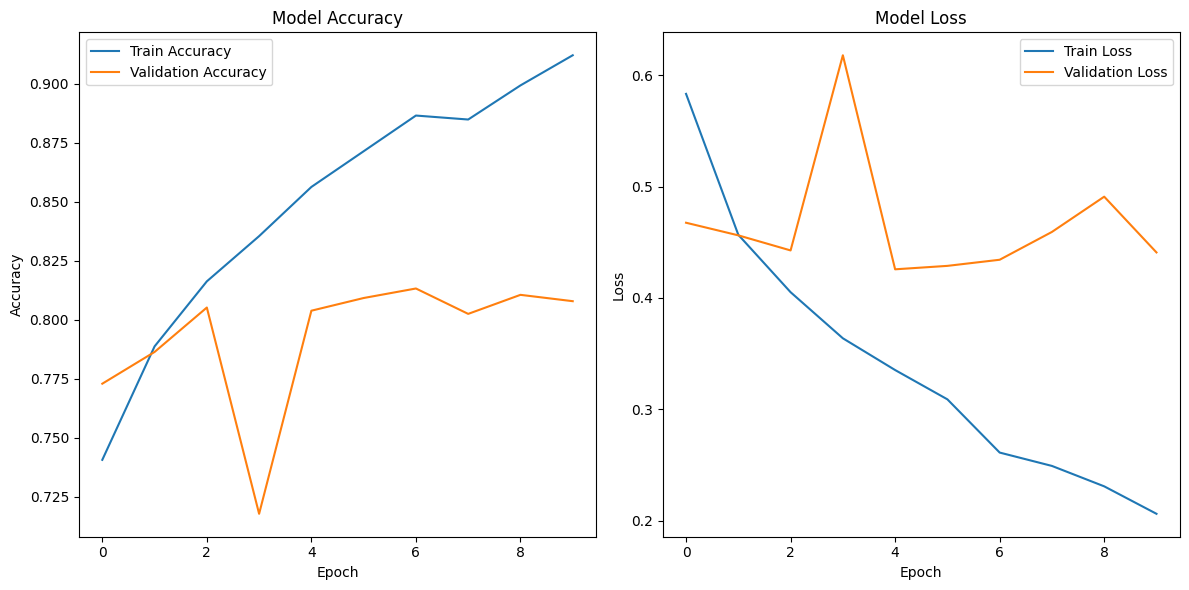

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# True labels from the test set
true_labels = test.classes

# Predict the class labels for the test set
pred_labels = np.argmax(mobilenet_model.predict(test), axis=1)

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=list(test.class_indices.keys()))

# Print the report
print(report)

279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 74ms/step
              precision    recall  f1-score   support

     Healthy       0.84      0.83      0.83       570
Osteoporosis       0.82      0.83      0.83       546

    accuracy                           0.83      1116
   macro avg       0.83      0.83      0.83      1116
weighted avg       0.83      0.83      0.83      1116



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = mobilenet_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step
Micro-Averaged ROC-AUC Score: 0.8337285521496047


CUSTOMISED CNN


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 242, 242, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 119, 119, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 59, 59, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 57, 57, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,938,690 (49.36 MB)

 Trainable params: 12,938,690 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 79s 100ms/step - accuracy: 0.6023 - loss: 0.8367 - val_accuracy: 0.7406 - val_loss: 0.5641 - learning_rate: 0.0010
Epoch 2/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 66s 89ms/step - accuracy: 0.7487 - loss: 0.5315 - val_accuracy: 0.7245 - val_loss: 0.5462 - learning_rate: 9.5000e-04
Epoch 3/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 82s 88ms/step - accuracy: 0.7870 - loss: 0.4814 - val_accuracy: 0.7728 - val_loss: 0.4968 - learning_rate: 9.0250e-04
Epoch 4/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 89s 98ms/step - accuracy: 0.8276 - loss: 0.4167 - val_accuracy: 0.7755 - val_loss: 0.4796 - learning_rate: 8.5737e-04
Epoch 5/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 65s 86ms/step - accuracy: 0.8417 - loss: 0.3504 - val_accuracy: 0.7930 - val_loss: 0.4505 - learning_rate: 8.1451e-04
Epoch 6/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 65s 86ms/step - accuracy: 0.8824 - loss: 0.2875 - val_accuracy: 0.8333 - val_loss: 0.4404 - learning_rate: 7.7378e-04
Epoch 7/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 65s 87ms/step -

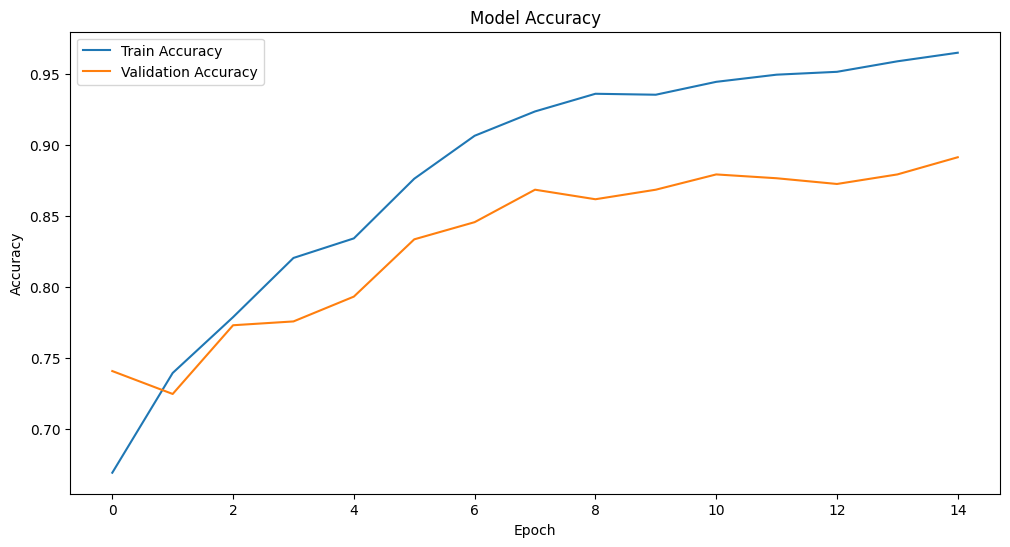

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define a customized CNN model
def create_custom_cnn(input_shape, num_classes):
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))


    # Second Convolutional Block
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third Convolutional Block
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Flatten the output and add Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Get input shape and number of classes
input_shape = (244, 244, 3)  # Image dimensions
num_classes = len(classes)   # Number of output classes based on the dataset

# Create the model
custom_cnn_model = create_custom_cnn(input_shape, num_classes)

# Display the model architecture
custom_cnn_model.summary()

# Train the model
history = custom_cnn_model.fit(
    train,
    epochs=15,  # Number of epochs
    validation_data=val,
    callbacks=[annealer, EarlyStopping(patience=5, restore_best_weights=True)]
)

# Evaluate the model on the test set
test_loss, test_accuracy = custom_cnn_model.evaluate(test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 69ms/step


<Figure size 1000x1000 with 0 Axes>

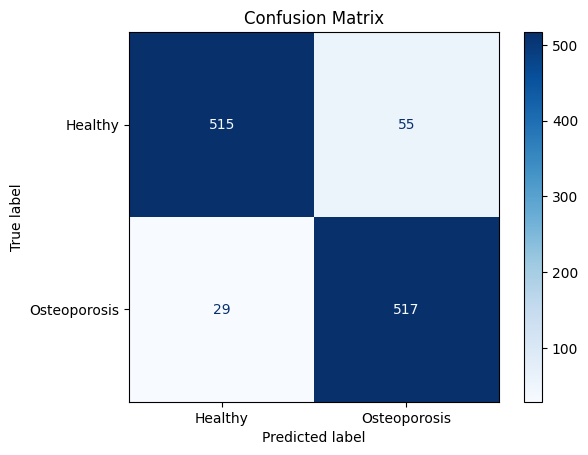

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Assuming `test` is a generator or dataset with batches and class labels
# Step 1: Get the true labels and predicted labels
true_labels = test.classes  # The true labels from the test set

# Predict the probabilities for each class
pred_probabilities = model.predict(test)  # Predictions from the model

# Get the predicted class indices by taking the class with the highest probability
pred_labels = np.argmax(pred_probabilities, axis=1)

# Step 2: Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Step 3: Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test.class_indices.keys()))

# Plotting the confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


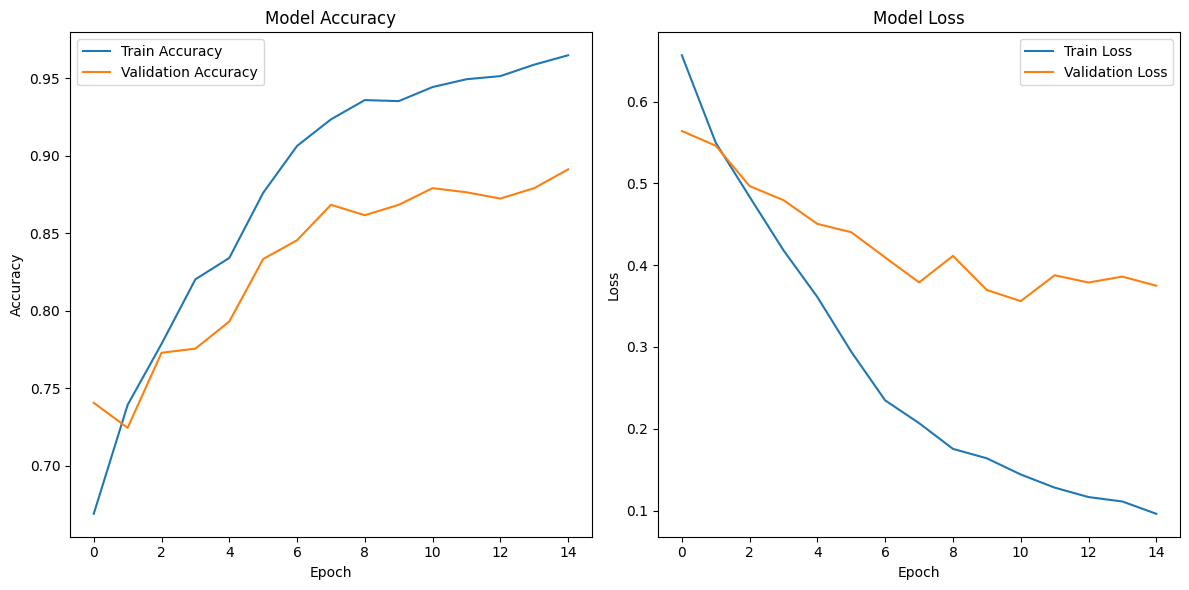

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# True labels from the test set
true_labels = test.classes

# Predict the class labels for the test set
pred_labels = np.argmax(custom_cnn_model.predict(test), axis=1)

# Generate classification report
report = classification_report(true_labels, pred_labels, target_names=list(test.class_indices.keys()))

# Print the report
print(report)


279/279 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step
              precision    recall  f1-score   support

     Healthy       0.92      0.90      0.91       570
Osteoporosis       0.90      0.92      0.91       546

    accuracy                           0.91      1116
   macro avg       0.91      0.91      0.91      1116
weighted avg       0.91      0.91      0.91      1116



In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer
import numpy as np  # Import numpy for argmax

# Assuming 'test' is your test data generator or dataset
# Get the true labels from the test set
y_test = test.classes

# Get the predicted class labels for the test set
pred_probabilities = custom_cnn_model.predict(test)  # Predictions from the model
pred3 = np.argmax(pred_probabilities, axis=1) # Get predicted labels

# Convert labels to one-hot encoded format
lb = LabelBinarizer()
lb.fit(y_test)
y_test_one_hot = lb.transform(y_test)
pred_one_hot = lb.transform(pred3)

# Compute micro-averaged ROC-AUC score
roc_auc = roc_auc_score(y_test_one_hot, pred_one_hot, average='micro')

print("Micro-Averaged ROC-AUC Score:", roc_auc)

279/279 ━━━━━━━━━━━━━━━━━━━━ 22s 77ms/step
Micro-Averaged ROC-AUC Score: 0.9106612685560055


RESNET

Epoch 1/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 88s 103ms/step - accuracy: 0.6157 - loss: 7.1929 - val_accuracy: 0.5954 - val_loss: 0.7527
Epoch 2/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 74s 97ms/step - accuracy: 0.7142 - loss: 0.6733 - val_accuracy: 0.7634 - val_loss: 0.4922
Epoch 3/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 74s 99ms/step - accuracy: 0.7567 - loss: 0.4972 - val_accuracy: 0.7742 - val_loss: 0.4877
Epoch 4/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.7802 - loss: 0.4641 - val_accuracy: 0.5524 - val_loss: 0.5788
Epoch 5/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 83s 98ms/step - accuracy: 0.7186 - loss: 0.5173 - val_accuracy: 0.6142 - val_loss: 0.5804
Epoch 6/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 80s 96ms/step - accuracy: 0.7570 - loss: 0.4937 - val_accuracy: 0.7554 - val_loss: 0.5225
Epoch 7/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 72s 96ms/step - accuracy: 0.7906 - loss: 0.4747 - val_accuracy: 0.7500 - val_loss: 0.5218
Epoch 8/15
744/744 ━━━━━━━━━━━━━━━━━━━━ 72s 96ms/step - accuracy: 0.7700 - loss: 0.5013 -

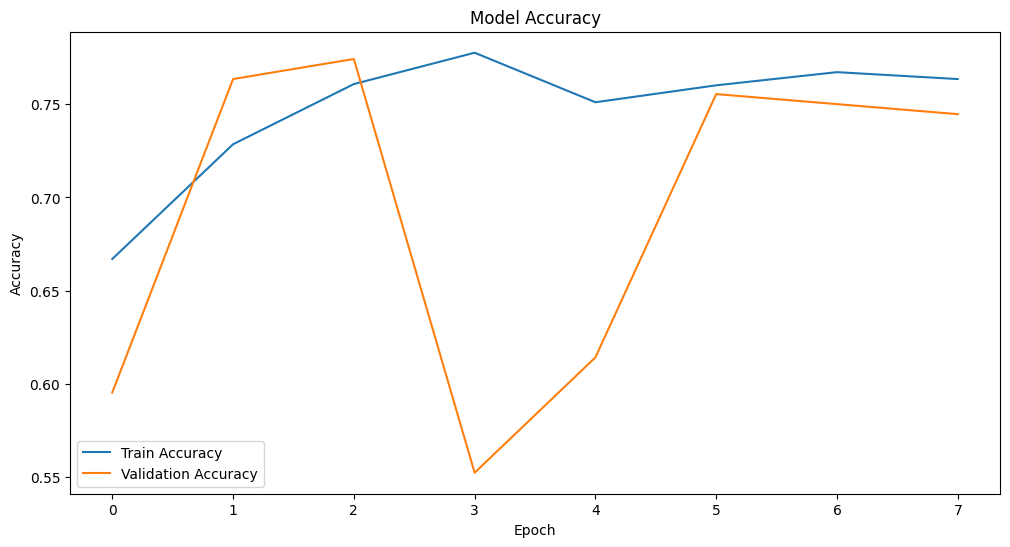

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import os
import tensorflow as tf

# Define the ResNet model
def create_resnet_model(input_shape=(244, 244, 3), num_classes=2): # Change input_shape
    resnet = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    resnet.trainable = False  # Freeze the base model

    model = Sequential([
        resnet,
        Flatten(),
        Dense(512, activation='relu'),
        Dense(num_classes, activation='softmax')  # Ensure num_classes matches your labels
    ])

    # Change loss function to CategoricalCrossentropy
    model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='categorical_crossentropy', # Use 'categorical_crossentropy'
                  metrics=['accuracy'])

    return model

# Create the model
num_classes = len(train.class_indices)
resnet_model = create_resnet_model(num_classes=num_classes)


# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = resnet_model.fit(
    train,
    epochs=15,  # Set the number of epochs as needed
    validation_data=val,
    callbacks=[early_stopping],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_accuracy = resnet_model.evaluate(test, verbose=1)

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

279/279 ━━━━━━━━━━━━━━━━━━━━ 24s 73ms/step


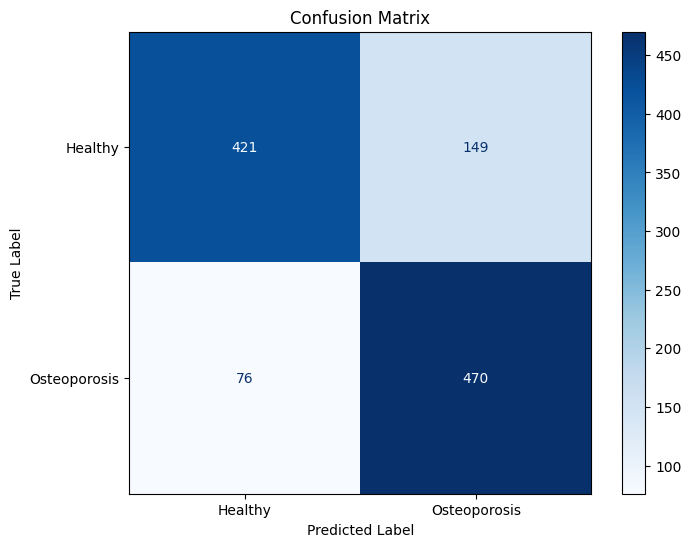

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get true labels and predicted labels
y_true = test.classes  # True labels
y_pred = np.argmax(resnet_model.predict(test), axis=1)  # Predicted labels

# Create the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(conf_matrix, display_labels=list(test.class_indices.keys())).plot(cmap="Blues", ax=plt.gca())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

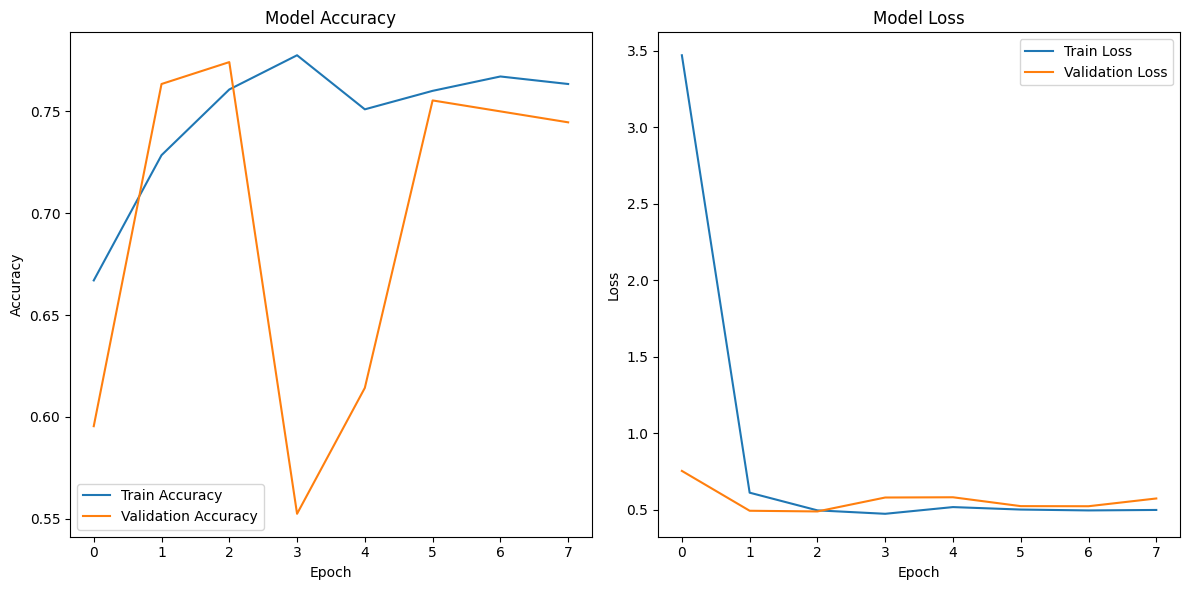

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Plot for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Get true labels and predicted labels
y_true = test.classes  # True labels
y_pred = np.argmax(resnet_model.predict(test), axis=1)  # Predicted labels

# Generate the classification report
class_labels = list(test.class_indices.keys())  # List of class names
report = classification_report(y_true, y_pred, target_names=class_labels)

print("Classification Report:")
print(report)


279/279 ━━━━━━━━━━━━━━━━━━━━ 22s 79ms/step
Classification Report:
              precision    recall  f1-score   support

     Healthy       0.85      0.74      0.79       570
Osteoporosis       0.76      0.86      0.81       546

    accuracy                           0.80      1116
   macro avg       0.80      0.80      0.80      1116
weighted avg       0.80      0.80      0.80      1116



279/279 ━━━━━━━━━━━━━━━━━━━━ 24s 86ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step
279/279 ━━━━━━━━━━━━━━━━━━━━ 21s 73ms/step


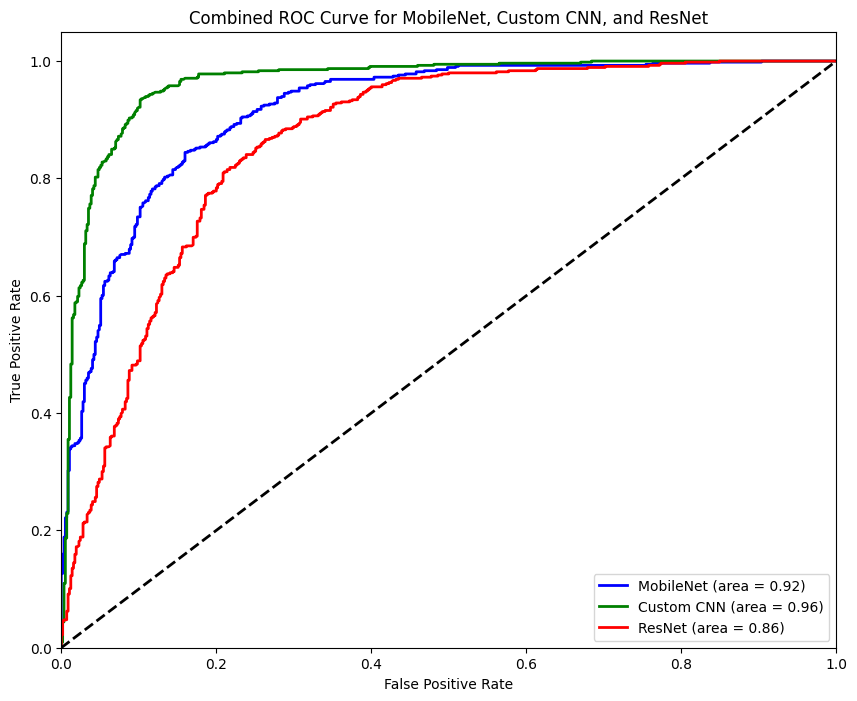

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarize the true labels for ROC AUC calculation
y_true = test.classes  # True labels as integers
y_true_binarized = label_binarize(y_true, classes=list(range(num_classes)))

# Get predicted probabilities from each model and select the positive class probability
y_pred_proba_mobilenet = mobilenet_model.predict(test)[:, 1]  # MobileNet predictions (positive class)
y_pred_proba_custom_cnn = custom_cnn_model.predict(test)[:, 1]  # Custom CNN predictions (positive class)
y_pred_proba_resnet = resnet_model.predict(test)[:, 1]  # ResNet predictions (positive class)

# Calculate the ROC curve and AUC for each model using micro-average
fpr_mobilenet, tpr_mobilenet, _ = roc_curve(y_true_binarized.ravel(), y_pred_proba_mobilenet) # Removed .ravel() from y_pred_proba_mobilenet
roc_auc_mobilenet = auc(fpr_mobilenet, tpr_mobilenet)

fpr_custom_cnn, tpr_custom_cnn, _ = roc_curve(y_true_binarized.ravel(), y_pred_proba_custom_cnn) # Removed .ravel() from y_pred_proba_custom_cnn
roc_auc_custom_cnn = auc(fpr_custom_cnn, tpr_custom_cnn)

fpr_resnet, tpr_resnet, _ = roc_curve(y_true_binarized.ravel(), y_pred_proba_resnet) # Removed .ravel() from y_pred_proba_resnet
roc_auc_resnet = auc(fpr_resnet, tpr_resnet)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_mobilenet, tpr_mobilenet, color='blue', lw=2, label='MobileNet (area = %0.2f)' % roc_auc_mobilenet)
plt.plot(fpr_custom_cnn, tpr_custom_cnn, color='green', lw=2, label='Custom CNN (area = %0.2f)' % roc_auc_custom_cnn)
plt.plot(fpr_resnet, tpr_resnet, color='red', lw=2, label='ResNet (area = %0.2f)' % roc_auc_resnet)
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for reference

# Plot settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curve for MobileNet, Custom CNN, and ResNet')
plt.legend(loc="lower right")
plt.show()


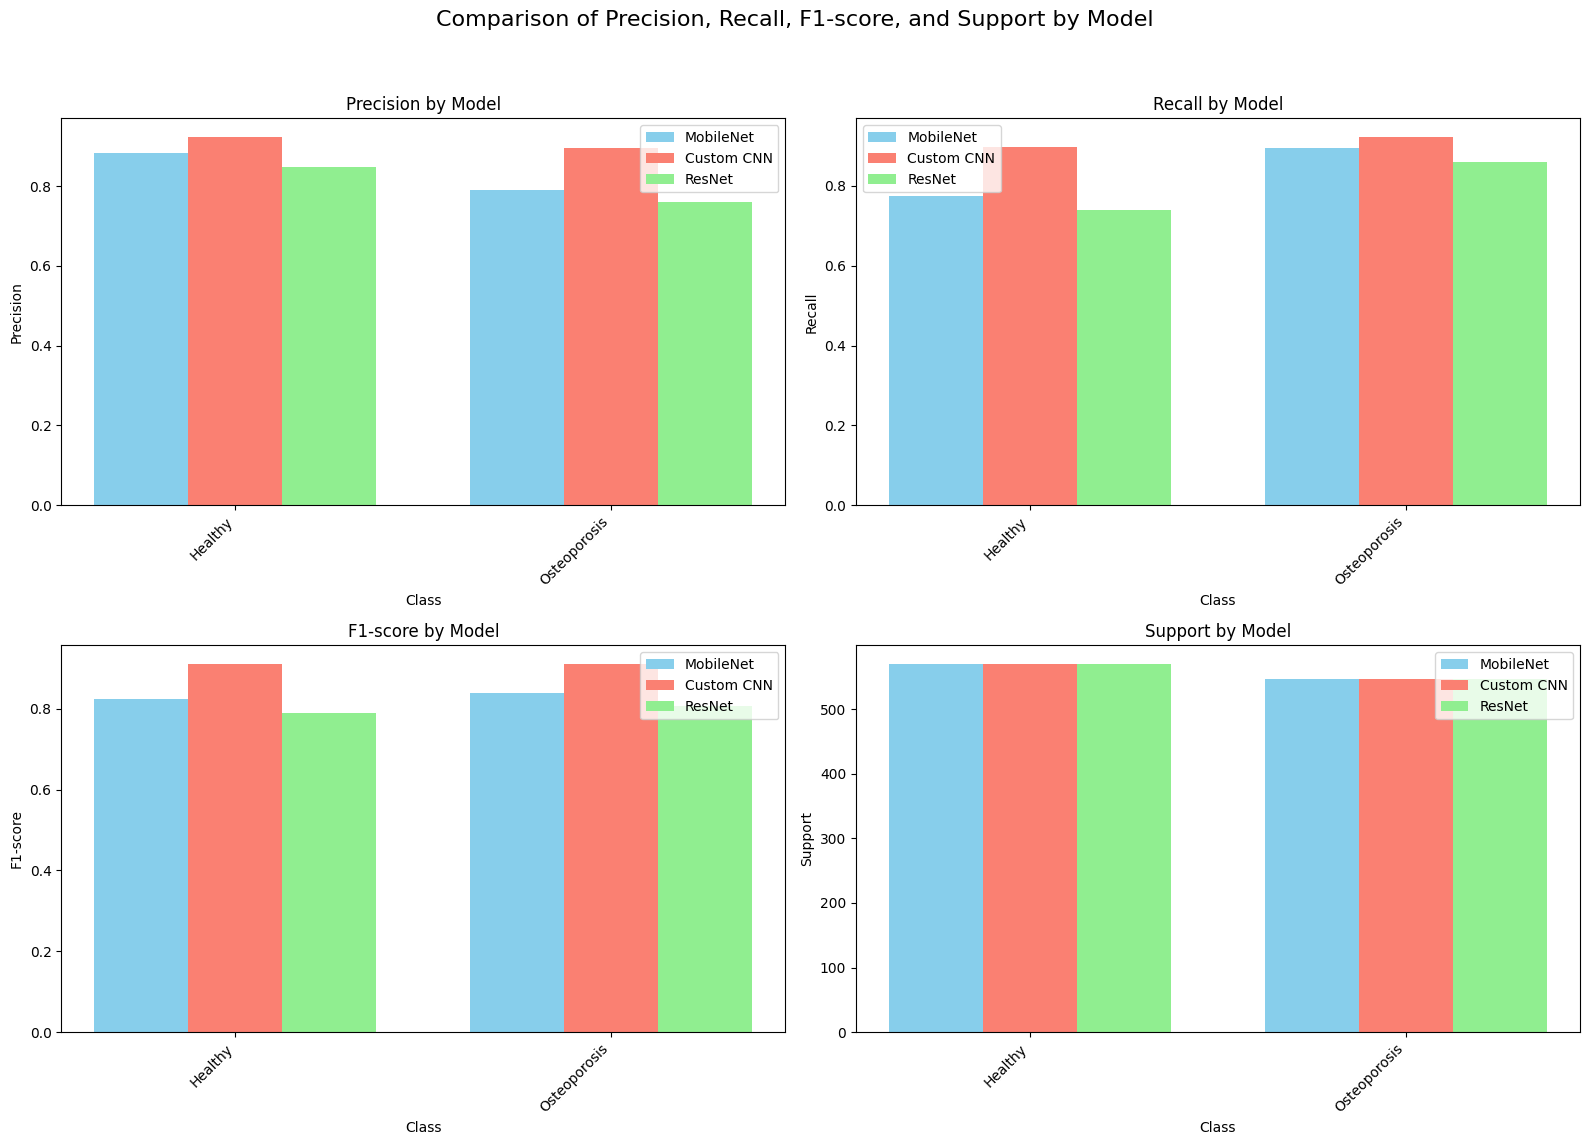

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics to plot
metrics = ['precision', 'recall', 'f1-score', 'support']
models = ['MobileNet', 'Custom CNN', 'ResNet']

# Generate class names excluding 'accuracy', 'macro avg', and 'weighted avg'
class_names = list(test.class_indices.keys())

# Create subplots for each metric
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparison of Precision, Recall, F1-score, and Support by Model', fontsize=16)

for i, metric in enumerate(metrics):
    ax = axes[i // 2, i % 2]

    # Plot bars for each model's metric
    bar_width = 0.25
    bar_positions = np.arange(len(class_names))

    ax.bar(bar_positions, df_mobilenet[metric][:-3], width=bar_width, label='MobileNet', color='skyblue', align='center')
    ax.bar(bar_positions + bar_width, df_custom_cnn[metric][:-3], width=bar_width, label='Custom CNN', color='salmon', align='center')
    ax.bar(bar_positions + 2 * bar_width, df_resnet[metric][:-3], width=bar_width, label='ResNet', color='lightgreen', align='center')

    # Configure the plot for each metric
    ax.set_xticks(bar_positions + bar_width)
    ax.set_xticklabels(class_names, rotation=45, ha="right")
    ax.set_xlabel('Class')
    ax.set_ylabel(metric.capitalize())
    ax.set_title(f'{metric.capitalize()} by Model')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
